In [1]:
import tensorflow as tf 
from tensorflow import keras 

In [2]:
tf.__version__

'2.10.0'

In [3]:
keras.__version__

'2.10.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist


In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full[:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [7]:
len(X_train_full)

60000

In [8]:
len(X_train_full[0]), len(X_train_full[0][0])

(28, 28)

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_test.shape

(10000, 28, 28)

In [14]:
y_train_full[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [12]:
# so theres 60000 train data and 10000 test data and tat each pixel is represented from a scale of 0.0 to 255.0 

In [13]:
# creating a validation set  

In [53]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/ 255.0
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]




In [54]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [55]:
class_names[y_train[0]]

'Coat'

In [56]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


model.layers

In [58]:
model.layers

In [59]:
hidden1 = model.layers[1]

In [60]:
hidden1.name

'dense_6'

In [61]:
weights, biases = hidden1.get_weights()

In [62]:
weights

array([[-0.02497804,  0.05152074, -0.00642274, ...,  0.02586506,
        -0.04096217,  0.01016874],
       [-0.04432069,  0.03317857,  0.06641126, ..., -0.06875192,
        -0.06749076, -0.0363507 ],
       [ 0.07286522,  0.02702335,  0.02538629, ...,  0.03054221,
         0.0063993 , -0.01278521],
       ...,
       [-0.018906  ,  0.04153208,  0.05578341, ..., -0.04991281,
         0.04943258,  0.01498886],
       [ 0.0356793 ,  0.0198115 , -0.07082849, ..., -0.0495607 ,
        -0.01127861, -0.01930192],
       [ 0.03996381,  0.04848038,  0.00614124, ...,  0.02571506,
         0.06975766,  0.03124928]], dtype=float32)

In [63]:
weights.shape

(784, 300)

In [64]:
biases.shape

(300,)

In [65]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = ["accuracy"])

In [66]:
history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7357 - accuracy: 0.7567 - val_loss: 0.5374 - val_accuracy: 0.8142
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4889 - accuracy: 0.8303 - val_loss: 0.4510 - val_accuracy: 0.8438
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4421 - accuracy: 0.8450 - val_loss: 0.4134 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4138 - accuracy: 0.8542 - val_loss: 0.3977 - val_accuracy: 0.8604
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3934 - accuracy: 0.8621 - val_loss: 0.3939 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3777 - accuracy: 0.8675 - val_loss: 0.3694 - val_accuracy: 0.8742
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3647 - accuracy: 0.8703 - val_loss: 0.3590 - val_accuracy:

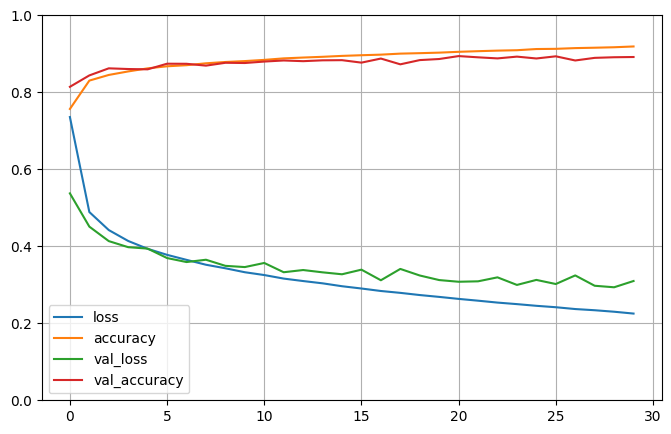

In [67]:
import pandas as pd 
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [68]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 832us/step - loss: 82.7019 - accuracy: 0.8270


[82.70188903808594, 0.8270000219345093]

In [69]:
# I dunno why the loss is still v huge, maybe its updated with % instead ? 

In [70]:
# but the graph clearly shoiws the sgd nature of zigzagging, but steadily decreasing the error and increasing the accuracy